In [1]:
### Author : Prasad Meesala
# Importin the necessary modules

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model, model_selection, preprocessing, metrics

In [2]:
# Collecting the data

df = pd.read_csv(r"C:\Users\meesa\Desktop\VSC-ML\Datasets\50_Startups.csv")
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB
None


,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


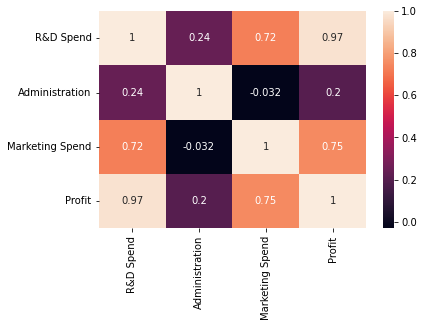

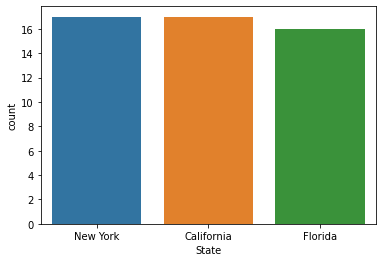

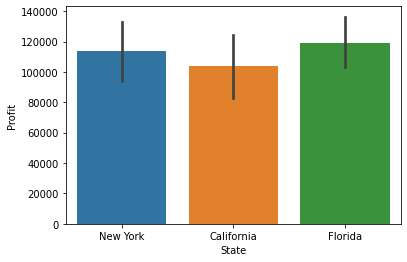

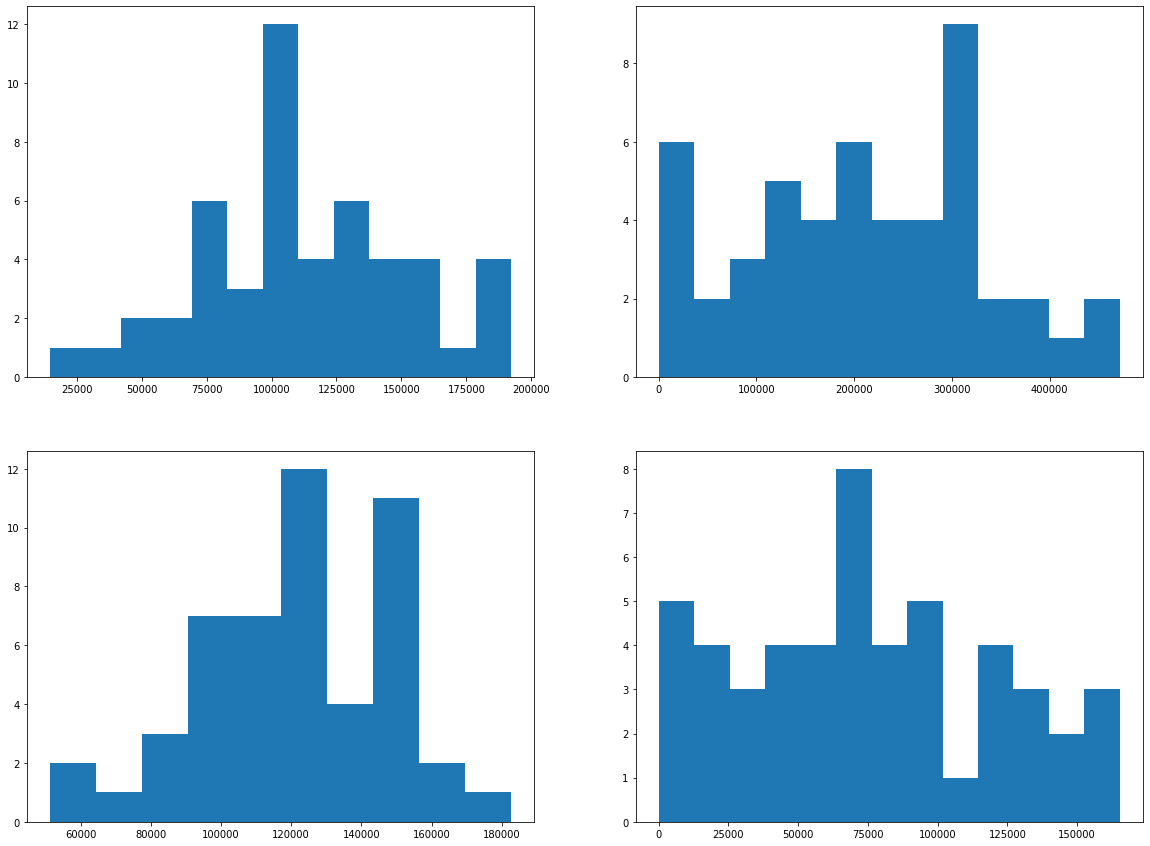

In [3]:
# Visualzing the data

sns.heatmap(df.corr(), annot = True)
plt.show()

sns.countplot(x = "State", data = df)
plt.show()

sns.barplot(x = "State", y = "Profit", data = df)
plt.show()

plt.figure(figsize = (20, 15))
plt.subplot(2, 2, 1)
plt.hist(bins = 13, x = df["Profit"])

plt.subplot(2, 2, 2)
plt.hist(bins = 13, x = df["Marketing Spend"])

plt.subplot(2, 2, 3)
plt.hist(bins = 10, x = df["Administration"])

plt.subplot(2, 2, 4)
plt.hist(bins = 13, x = df["R&D Spend"])
plt.show()

In [4]:
# Data wrangling and analysis

dummies = pd.get_dummies(df['State'])
df = pd.concat([df, dummies], axis = 1)
df.drop(['State', 'Florida'], axis = 1, inplace = True)
df.head()

,R&D Spend,Administration,Marketing Spend,Profit,California,New York
0,165349.20,136897.80,471784.10,192261.83,0,1
1,162597.70,151377.59,443898.53,191792.06,1,0
2,153441.51,101145.55,407934.54,191050.39,0,0
3,144372.41,118671.85,383199.62,182901.99,0,1
4,142107.34,91391.77,366168.42,166187.94,0,0


In [5]:
# Scaling the features

scaler = preprocessing.MinMaxScaler()

scaler.fit(df[['Profit']])
df['Profit'] = scaler.transform(df[['Profit']])

scaler.fit(df[['Administration']])
df['Administration'] = scaler.transform(df[['Administration']])

scaler.fit(df[['Marketing Spend']])
df['Marketing Spend'] = scaler.transform(df[['Marketing Spend']])

scaler.fit(df[['R&D Spend']])
df['R&D Spend'] = scaler.transform(df[['R&D Spend']])

df.head()

,R&D Spend,Administration,Marketing Spend,Profit,California,New York
0,1.000000,0.651744,1.000000,1.000000,0,1
1,0.983359,0.761972,0.940893,0.997355,1,0
2,0.927985,0.379579,0.864664,0.993178,0,0
3,0.873136,0.512998,0.812235,0.947292,0,1
4,0.859438,0.305328,0.776136,0.853171,0,0


In [6]:
# Splitting the data into training and testing data

X = df.drop("Profit", axis = 1).values
y = df['Profit'].values

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size = 0.2)

In [7]:
# Trainging the model

model = linear_model.LinearRegression()

model.fit(X_train, y_train)

y_predicted = model.predict(X_test)
print(y_test, y_predicted)

print(model.score(X_train, y_train))
print(model.score(X_test, y_test))

[0.50865352 0.4606257  0.46193942 0.79649041 0.52214616 0.79440736
 0.46627976 0.99317808 0.48610784 0.28294041] [0.5571729  0.41792021 0.41368373 0.80490118 0.48717755 0.82249667
 0.45574277 0.95056133 0.47955573 0.16909026]
0.9509304463178576
0.9426454042255481
